In [19]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

stock_symbol = 'NVDA'
start_date = '2021-01-01'
end_date = '2023-06-30'
interval = '1d'

# Retrieve stock data
data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)

# Save the data to a CSV file
csv_filename = 'stock_data.csv'
data.to_csv(csv_filename)

data["Date"] = data.index
data = data[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

figure = go.Figure(data=[go.Candlestick(
    x=data["Date"],  # X-axis: Date
    open=data["Open"],  # Opening price
    high=data["High"],  # Highest price
    low=data["Low"],  # Lowest price
    close=data["Close"]  # Closing price
)])

figure.update_layout(
    height=500,
    title="Nvidia Stock Price Analysis",  # Set the title
    xaxis_rangeslider_visible=False,
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

figure.show()

[*********************100%%**********************]  1 of 1 completed


In [20]:
figure = px.bar(data, x="Date", y="Close", color="Close")
figure.update_layout(
    height=500,
    title="Final Price of every day analysis",
    xaxis_title="Date",
    yaxis_title="Final Price",
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
figure.show()


In [21]:
figure = px.line(data, x='Date', y='Close', 
                 title='Nvidia Stock Analysis with Rangeslider')
figure.update_layout(
    height=500,
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [22]:
figure = px.line(data, x='Date', y='Close', 
                 title='Nvidia Stock Market Analysis with Time Period Selectors')
figure.update_layout(
    height=500,
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [23]:
figure = px.scatter(data, x='Date', y='Close', range_x=['2021-01-04', '2023-06-29'],
                 title="Stock Market Analysis by Hiding Weekend Gaps")

figure.update_layout(
    height=500,
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"])
    ]
)
figure.show()

In [24]:
data1 = data[["Date", "Close"]]
print(data1.head())

        Date       Close
0 2021-01-04  131.134995
1 2021-01-05  134.047501
2 2021-01-06  126.144997
3 2021-01-07  133.440002
4 2021-01-08  132.767502


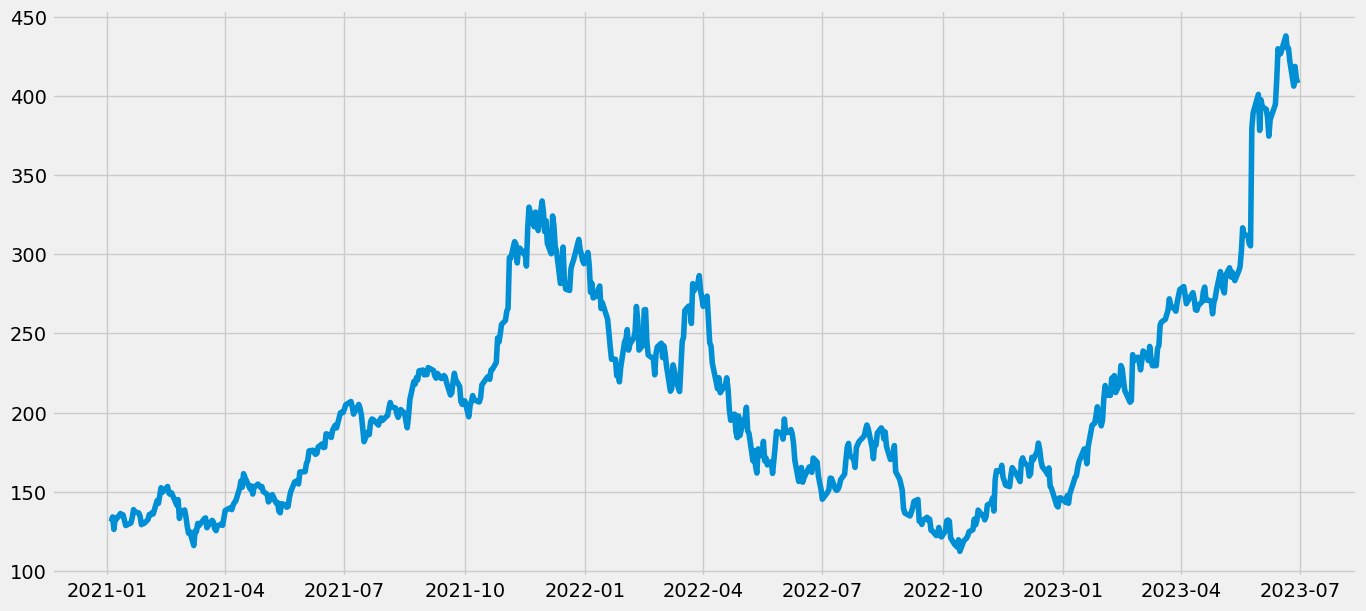

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7))
plt.plot(data1["Date"], data1["Close"])

<Figure size 640x480 with 0 Axes>

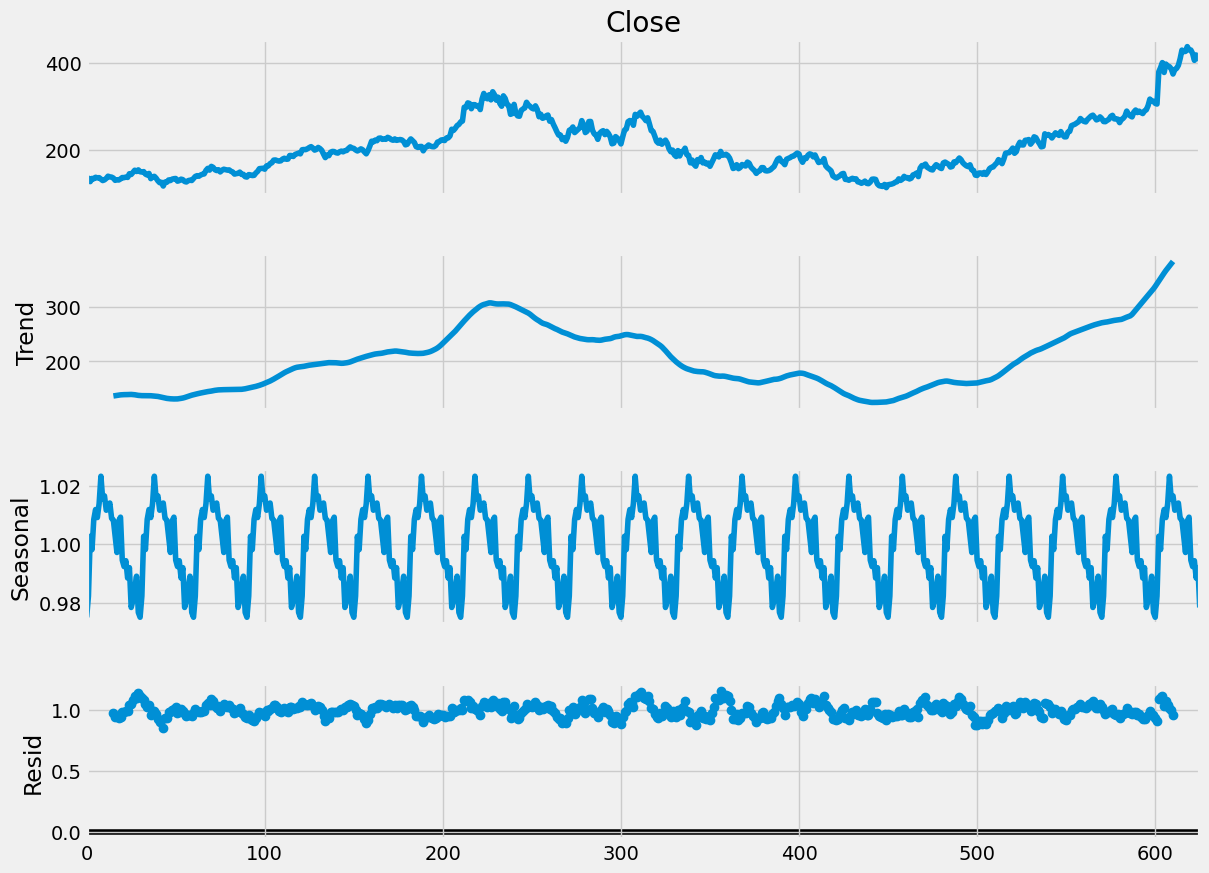

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data1["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 10)
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

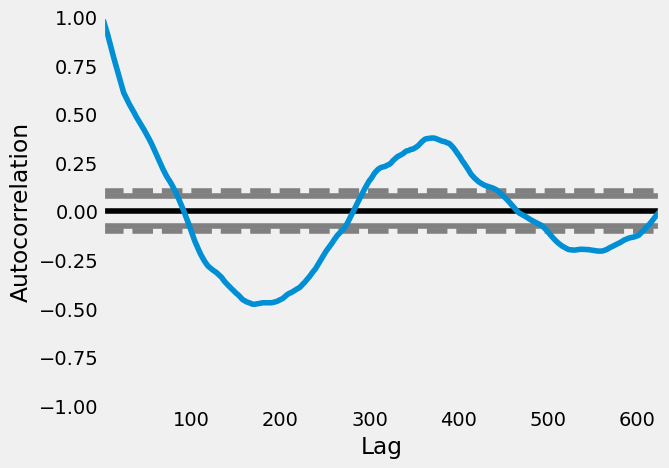

In [27]:
pd.plotting.autocorrelation_plot(data1["Close"])

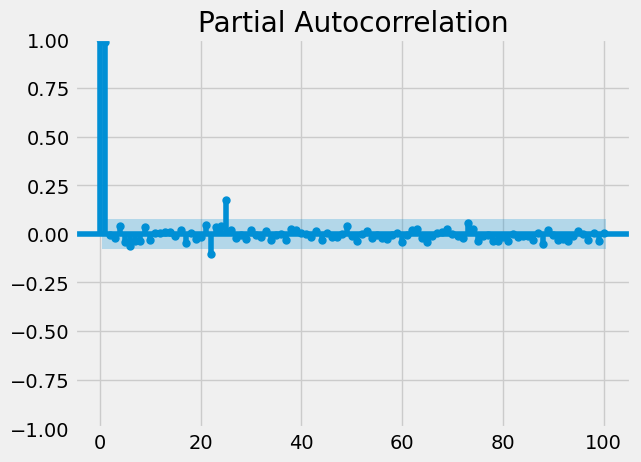

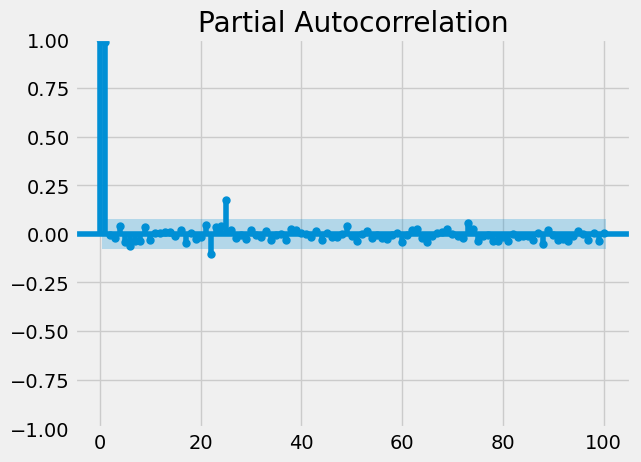

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data1["Close"], lags = 100)

In [29]:
p, d, q = 3, 1, 2

# Import the updated ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Ensure your data is in a pandas Series format
# (The newer ARIMA implementation prefers a Series rather than a DataFrame column.)
# Assuming data1["Close"] is already a pandas DataFrame column, you can convert it directly:
series_data = data1["Close"].astype('float64')

# Build the ARIMA model
model = ARIMA(series_data, order=(p, d, q))

# Fit the model
fitted = model.fit()

# Print the summary
print(fitted.summary())

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  626
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2161.276
Date:                Wed, 30 Aug 2023   AIC                           4334.552
Time:                        12:48:30   BIC                           4361.178
Sample:                             0   HQIC                          4344.898
                                - 626                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7457      0.039     19.354      0.000       0.670       0.821
ar.L2         -0.9830      0.030    -32.534      0.000      -1.042      -0.924
ar.L3         -0.0197      0.038     -0.525      0.6

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [30]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      131.134893
2      134.009785
3      126.208760
4      133.401187
          ...    
621    428.954045
622    422.478340
623    408.119262
624    419.555205
625    410.544722
Name: predicted_mean, Length: 626, dtype: float64


In [31]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\pk989\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  626
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -2145.522
Date:                            Wed, 30 Aug 2023   AIC                           4313.044
Time:                                    12:48:59   BIC                           4361.646
Sample:                                         0   HQIC                          4331.946
                                            - 626                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7314      0.053     13.791      0.000       0.627       0.835
ar.L2         -0.9592      0.040   

In [32]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

626    410.291056
627    412.404641
628    414.290818
629    413.758510
630    415.886739
631    414.208999
632    414.425662
633    414.562448
634    414.422797
635    416.028245
636    415.086011
637    414.119616
638    417.035495
639    419.411795
640    420.979625
641    419.154497
642    419.885766
643    419.711369
644    421.444774
645    421.943740
646    421.535953
647    420.502296
648    421.131583
649    422.237092
650    423.540761
651    424.574455
652    424.048410
653    422.112771
654    423.712506
655    425.223509
656    426.874674
657    426.113135
658    424.918099
659    425.007922
660    426.712896
661    427.703366
662    429.260002
663    428.501494
664    428.851549
665    428.342652
666    430.929260
667    431.551670
668    431.443855
669    430.378541
670    431.032197
671    431.706015
672    433.884420
673    433.875037
674    433.070713
675    433.516815
676    434.746362
Name: predicted_mean, dtype: float64


<AxesSubplot: >

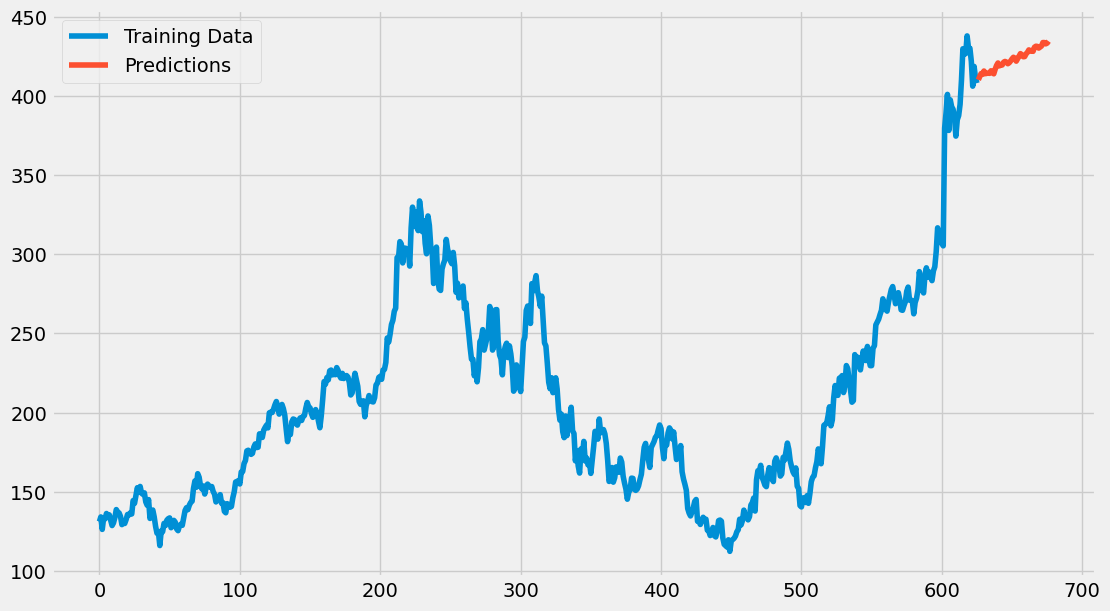

In [33]:
data["Close"].plot(legend=True, label="Training Data", figsize=(12, 7))
predictions.plot(legend=True, label="Predictions")